# 311 REPORTS
by Hannah Kuklinski

## Brief Introduction:
Our group decided to find the Safest Neighborhood for pedestrians. We decided this as our focus because of the data sets that we each selected to analyze. I decided to evaluate citizen reports of safety/law violations that could be harmful to pedestrians, Sherry decided to analyze the types of crosswalks, and Ramana decided to analyze Police Reports.
## What is a 311 report?
311 reports are official requests from citizens that are sent to the city/local government. These reports range in request types, as you will be able to see below. The government takes these requests via their website or over the phone, gathers information about the request type- ranging from what type of request is being made, what department will be in charge of resolving the use, and lastly the location of where the individual is requesting the service.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

data = pd.read_csv("311_reports2022_filtered.csv", index_col="_id", parse_dates=True)
population = pd.read_csv("Pittsburgh_2015_census_data.csv", index_col="_id")

## The Original Data Preview
The chart below shows the first ten elements of the data set I used. It shows the type of information being collected.

In [2]:
#quick preview of the what information is included in the data set
data.head(10)

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,STATUS,DEPARTMENT,NEIGHBORHOOD
_id,,,,,,
678099,590853,2022-01-01T00:36:00,Police Department,1,311,Crafton Heights
678100,590854,2022-01-01T00:36:00,Gang Activity,1,Police - Zones 1-6,Crafton Heights
678101,590855,2022-01-01T00:59:00,Mayor's Office,1,311,Crafton Heights
678102,590856,2022-01-01T01:00:00,Ethics Office,1,NaN,Crafton Heights
678103,590857,2022-01-01T01:01:00,Employment/Hiring,1,PCSC,Crafton Heights
678104,590858,2022-01-01T01:01:00,Commission on Human Relations,1,Commission on Human Relations,Crafton Heights
678105,590859,2022-01-01T01:02:00,Misconduct/City Employee,1,OMI,Crafton Heights
678106,590860,2022-01-01T01:04:00,Panhandling,1,Police - Zones 1-6,Chateau
678107,590861,2022-01-01T01:05:00,Ethics Office,1,NaN,Chateau


### Initial Population Data

In [3]:
population.head(10)

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
_id,,,,
1,Allegheny Center,1,1411.0,196.000000
2,Allegheny West,2,343.0,96.000000
3,Allentown,3,2558.0,449.773276
4,Arlington,4,1852.0,348.188168
5,Arlington Heights,5,272.0,126.000000
6,Banksville,6,3858.0,581.107563
7,Bedford Dwellings,7,1349.0,180.000000
8,Beechview,8,8078.0,719.658252
9,Beltzhoover,9,1702.0,343.072879


## Exploring Request Types in the Data
As stated earlier, there are many different types of requests that can be made. The table below shows how many different types of requests were made by locals.

In [4]:
#gives the total types of 311 requests
display_types= data["REQUEST_TYPE"].value_counts()
print(display_types.head(15))

Weeds/Debris                            10438
Snow/Ice removal                         8899
Missed Refuse Pick Up                    7355
Potholes                                 5921
Referral                                 4638
Missed Recycling Pick Up                 3383
Illegal Parking                          2944
Abandoned Vehicle (parked on street)     2697
Question                                 2692
Refuse Violations                        2562
Litter, Public Property                  2181
Building Maintenance                     2113
Street Light - Repair                    1857
Blue Bin Containers                      1665
Overgrowth                               1522
Name: REQUEST_TYPE, dtype: int64


## Visualization 
This is a visual representation of the data displayed in the chart above.

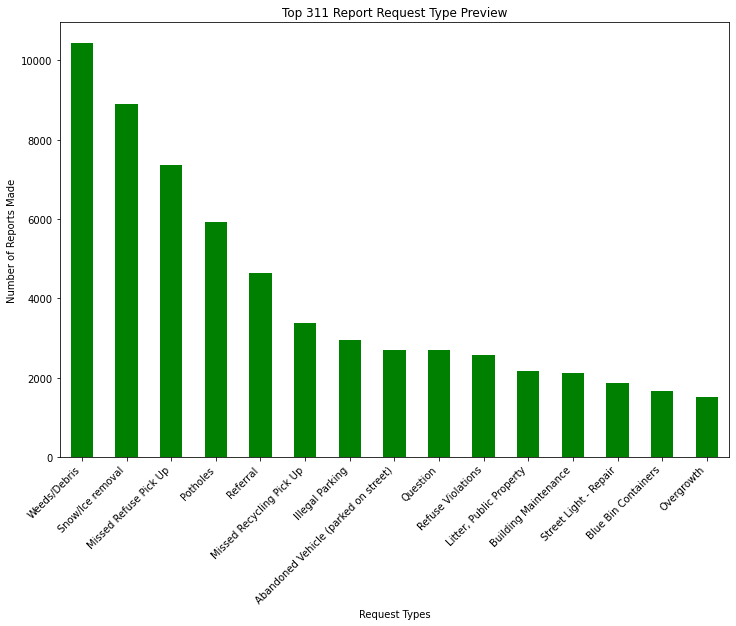

In [5]:
#gives the total types of 311 requests
display_types= data["REQUEST_TYPE"].value_counts().head(15)
#print(display_types.head(30))
plt.figure(figsize=(12,8)) #sets the width/height of our graph area
display_types.plot(kind='bar', color='green')
plt.title('Top 311 Report Request Type Preview')
plt.xlabel('Request Types')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right') #rotate the x labels 45 degrees to the right, easier to read
plt.show()

To see which neighborhood is safest for pedestrians, I focused on broken streetlights, broken sidewalks, speeding, and illegal parking.

## Exploring the Neighborhoods Represented in the Data
The chart below shows the total number of reports made by each neighborhood in 2022, from most to least. For simplicity, only the first 15 neighborhoods are displayed.

In [6]:
#this prints out the number of total requests made for each neighborhood
total_ngh_reports=data["NEIGHBORHOOD"].value_counts().head(15)
print(total_ngh_reports)

Brookline                    4793
Carrick                      4256
South Side Flats             4081
South Side Slopes            3624
Squirrel Hill South          3597
Bloomfield                   3281
Mount Washington             2750
Central Business District    2709
Shadyside                    2296
Beechview                    2258
Greenfield                   2087
Brighton Heights             2046
Marshall-Shadeland           1865
Central Oakland              1758
Squirrel Hill North          1754
Name: NEIGHBORHOOD, dtype: int64


## Neighborhood Graph

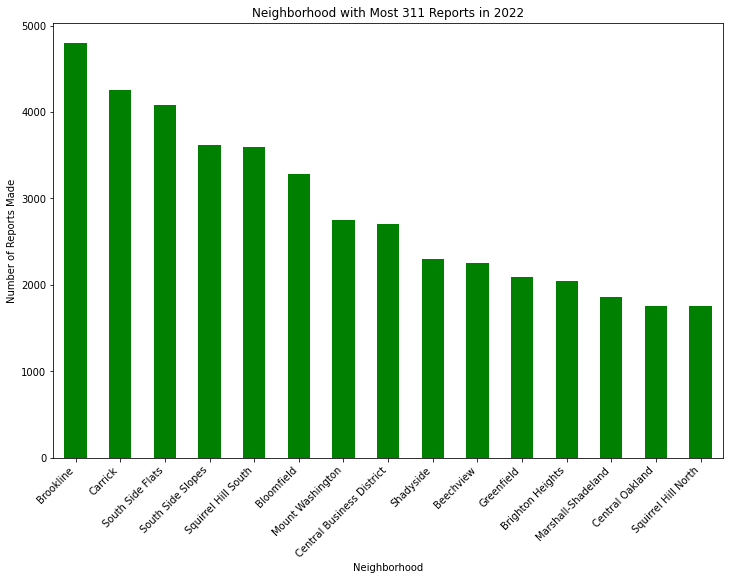

In [7]:
plt.figure(figsize=(12,8))
total_ngh_reports.plot(kind='bar', color='green')
plt.title('Neighborhood with Most 311 Reports in 2022')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()

## Finding Our Data Sets
I decided to focus on four separate metrics for this project- Broken Sidewalks, Illegal Parking, Street Light- Repair, and Speeding. Broken sidewalks can provide challenges to those who are disabled. Broken streetlights can be a tripping hazard for people will not be able to see where they are walking and also provide a sense of unsafety since they are unable to see clearly if others approach them. Illegal parking can prove to be an issue to pedestrians if they block certain sidewalks/crosswalks- preventing those individuals who are disabled from accessing the sidewalk. Finally, speeding can be catastrophic to pedestrians who are crossing the street.

In [8]:
#declaring our dictionaries
sidewalk_dict= {}
streetlight_dict= {}
parking_dict={}
speeding_dict={}

#filtering the data by our desired queries
filtered_data= data[data["REQUEST_TYPE"]=="Broken Sidewalk"]
filtered_data_p= data[data["REQUEST_TYPE"]=="Illegal Parking"]
filtered_data_sl= data[data["REQUEST_TYPE"]=="Street Light - Repair"]
filtered_data_s= data[data["REQUEST_TYPE"]=="Speeding"]

#for broken sidewalk:
for index,row in filtered_data.iterrows():
    request_type= row["REQUEST_TYPE"]
    ngh= row["NEIGHBORHOOD"]
    if (request_type=="Broken Sidewalk"):
        if (ngh not in sidewalk_dict):
            sidewalk_dict[ngh]=1
        elif (ngh in sidewalk_dict):
            sidewalk_dict[ngh]+=1
            
#for broken street lights
for index,row in filtered_data_sl.iterrows():
    request_type= row["REQUEST_TYPE"]
    ngh= row["NEIGHBORHOOD"]
    if (request_type=="Street Light - Repair"):
        if (ngh not in streetlight_dict):
            streetlight_dict[ngh]=1
        elif (ngh in streetlight_dict):
            streetlight_dict[ngh]+=1
            
#for illegal parking:
for index,row in filtered_data_p.iterrows():
    request_type= row["REQUEST_TYPE"]
    ngh= row["NEIGHBORHOOD"]
    if (request_type=="Illegal Parking"):
        if (ngh not in parking_dict):
            parking_dict[ngh]=1
        elif (ngh in parking_dict):
            parking_dict[ngh]+=1

#for speeding violations:
for index,row in filtered_data_s.iterrows():
    request_type= row["REQUEST_TYPE"]
    ngh= row["NEIGHBORHOOD"]
    if (request_type=="Speeding"):
        if (ngh not in speeding_dict):
            speeding_dict[ngh]=1
        elif (ngh in speeding_dict):
            speeding_dict[ngh]+=1


## Explanation:
I started off by creating dictionaries of the data sets that I wanted to analyze. I selected the REQUEST_TYPE row and counted the total number of reports for each neighborhood. If the neighborhood was present in the dictionary, I added one to the neighborhood dictionary value. If the neighborhood was not present, I added it to the dictionary and gave it a value of 1.

In [9]:
streetlight_series= pd.Series(streetlight_dict)
sidewalk_series= pd.Series(sidewalk_dict)
parking_series= pd.Series(parking_dict)
speeding_series=pd.Series(speeding_dict)


## Visualizing the Data: Sidewalks
Now that we have created a series, we can make a graph of the values. However, my data is not sorted from greatest to least. Since it adds the neighborhood whenever it is first mention, the location of the neighborhoods in my array depend on when the neighborhood's first report was made. We can change that by sorting the dictionary items by their values.

In [10]:
print("Before the Sort:")
print("\nBroken Sidewalks: \n---------------------------------")
print(sidewalk_dict)


Before the Sort:

Broken Sidewalks: 
---------------------------------
{'Bloomfield': 22, 'Squirrel Hill North': 38, 'Elliott': 5, 'Strip District': 10, 'Carrick': 15, 'East Liberty': 27, 'Hays': 2, 'Polish Hill': 6, 'East Allegheny': 10, 'Homewood South': 6, 'Brighton Heights': 13, 'Shadyside': 42, 'Central Business District': 56, 'Squirrel Hill South': 58, 'North Oakland': 16, 'Friendship': 4, 'Mount Washington': 23, 'South Oakland': 18, 'West Oakland': 3, 'Bon Air': 1, 'Point Breeze': 19, 'Windgap': 5, 'Bluff': 10, 'Beechview': 16, 'Brookline': 37, 'Oakwood': 1, nan: 12, 'Point Breeze North': 12, 'South Side Flats': 82, 'Lower Lawrenceville': 16, 'Crafton Heights': 7, 'Central Lawrenceville': 25, 'Hazelwood': 11, 'Duquesne Heights': 5, 'Central Oakland': 13, 'Allegheny West': 6, 'Central Northside': 24, 'Perry North': 12, 'North Shore': 3, 'Sheraden': 6, 'Stanton Heights': 4, 'Allentown': 4, 'South Side Slopes': 19, 'Marshall-Shadeland': 3, 'Overbrook': 2, 'Larimer': 7, 'Greenfield'

All the dictionaries are initally in an unsorted manner due to the nature of how we add neighborhoods to the dictionary.

### Sorting the Data and Graphing

Broken Sidewalks
--------------------------------
South Side Flats             82
Squirrel Hill South          58
Central Business District    56
Shadyside                    42
Squirrel Hill North          38
Brookline                    37
East Liberty                 27
Central Lawrenceville        25
Central Northside            24
Mount Washington             23
Bloomfield                   22
South Side Slopes            19
Greenfield                   19
Point Breeze                 19
South Oakland                18
dtype: int64


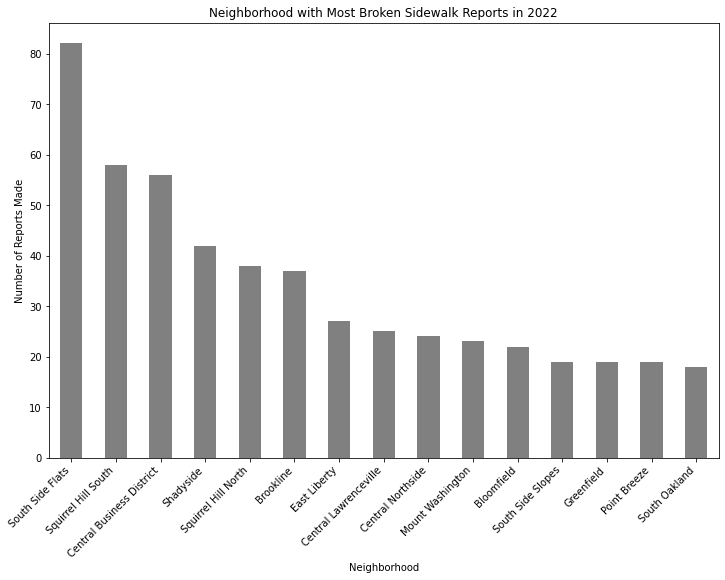

In [11]:
print("Broken Sidewalks")
print("--------------------------------")
sidewalk_series_sorted= sidewalk_series.sort_values(ascending=False)
print(sidewalk_series_sorted.head(15))

#make a graph! :)
plt.figure(figsize=(12,8))
sidewalk_series_sorted.head(15).plot(kind='bar', color='gray')
plt.title('Neighborhood with Most Broken Sidewalk Reports in 2022')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()


## Broken Streetlight Data

Broken Streetlights
--------------------------------
Brookline                    93
Squirrel Hill South          93
Central Business District    69
Shadyside                    68
Carrick                      64
Bloomfield                   54
Beechview                    49
South Side Slopes            49
Greenfield                   47
Squirrel Hill North          45
Brighton Heights             45
Mount Washington             45
Lincoln-Lemington-Belmar     41
Sheraden                     38
South Side Flats             33
dtype: int64


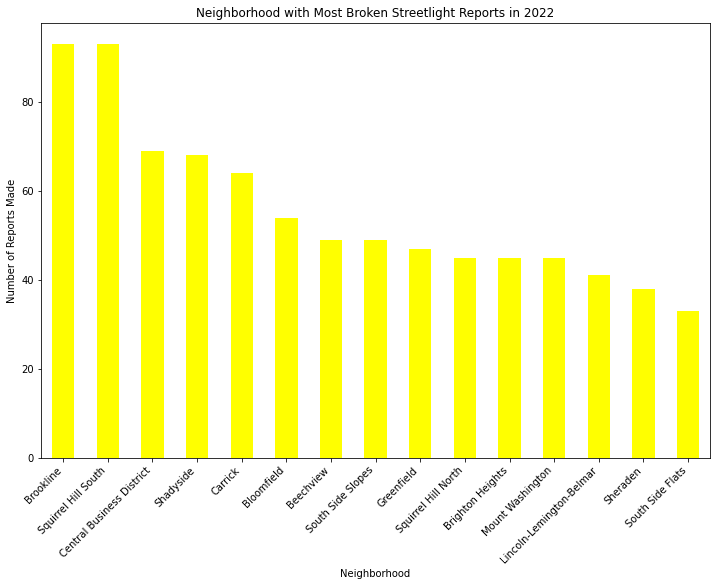

In [12]:
print("Broken Streetlights")
print("--------------------------------")
streetlight_series_sorted= streetlight_series.sort_values(ascending=False)
print(streetlight_series_sorted.head(15))

#make a graph! :)
plt.figure(figsize=(12,8))
streetlight_series_sorted.head(15).plot(kind='bar', color='yellow')
plt.title('Neighborhood with Most Broken Streetlight Reports in 2022')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()

## Illegal Parking Data

Illegal Parking
--------------------------------
Central Business District    457
Bloomfield                   165
Strip District               138
South Side Flats             109
East Liberty                  95
Central Lawrenceville         95
Brookline                     94
Squirrel Hill South           91
Central Oakland               82
North Oakland                 80
Carrick                       76
Mount Washington              72
Shadyside                     69
Greenfield                    65
Lower Lawrenceville           62
dtype: int64


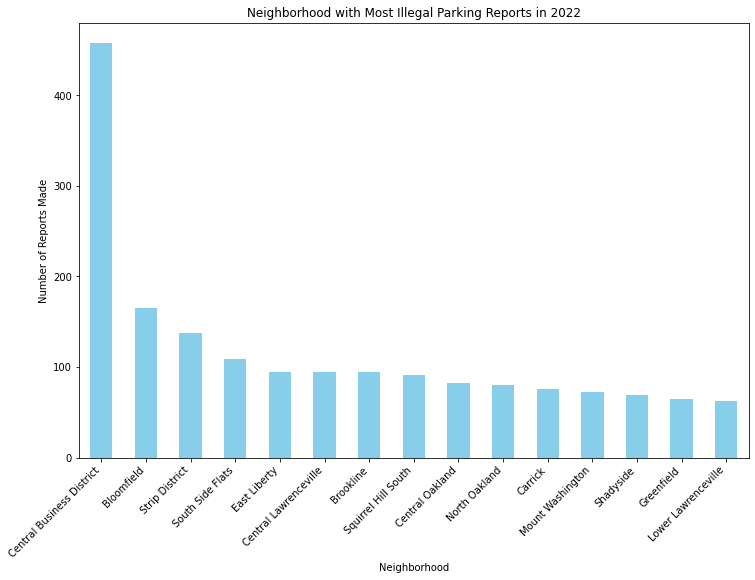

In [13]:
print("Illegal Parking")
print("--------------------------------")
parking_series_sorted= parking_series.sort_values(ascending=False)
print(parking_series_sorted.head(15))

#make a graph! :)
plt.figure(figsize=(12,8))
parking_series_sorted.head(15).plot(kind='bar', color='skyblue')
plt.title('Neighborhood with Most Illegal Parking Reports in 2022')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()

## Speeding Data

Speeding
--------------------------------
Brookline              25
Point Breeze           22
Homewood South         19
Brighton Heights       18
Carrick                18
Beechview              16
Squirrel Hill South    15
NaN                    14
Knoxville              12
Lower Lawrenceville     9
Greenfield              9
Marshall-Shadeland      8
Bon Air                 8
Perry South             8
Stanton Heights         8
dtype: int64


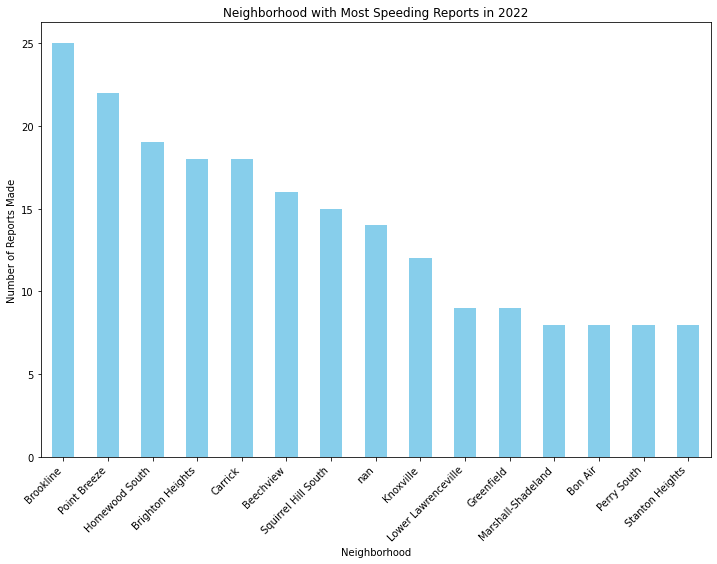

In [14]:
print("Speeding")
print("--------------------------------")
speeding_series_sorted= speeding_series.sort_values(ascending=False)
print(speeding_series_sorted.head(15))

#make a graph! :)
plt.figure(figsize=(12,8))
speeding_series_sorted.head(15).plot(kind='bar', color='skyblue')
plt.title('Neighborhood with Most Speeding Reports in 2022')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()

## Calculating the Worst Neighborhood for Pedestrians
I gathered the total for each section and added it to a new dictionary (to later make a series for analysis). I later sorted it to find the neighborhood with the most reports in these areas to make my conclusion of which neighborhood is the best/worst for pedestrians

In [15]:
total_dict = {}

#search through the four dictionaries to get a total
for ngh in sidewalk_dict.keys(): #for each neighborhood in sidewalk
    total_dict[ngh] = sidewalk_dict[ngh] #add the neighborhood to total_dict with the value of the sidewalk_dict[ngh] 

#for each, check if its in the total_dict and if not add it--> covers possible errors
for ngh in parking_dict.keys():
    if ngh not in total_dict:
        total_dict[ngh]= parking_dict[ngh]
    else:
        total_dict[ngh] += parking_dict[ngh] #just add parking values to existing values

for ngh in streetlight_dict.keys():
    if ngh not in total_dict:
        total_dict[ngh]= streetlight_dict[ngh]
    else:
        total_dict[ngh] += streetlight_dict[ngh]

for ngh in speeding_dict.keys():
    if ngh not in total_dict:
        total_dict[ngh]= speeding_dict[ngh]
    else:
        total_dict[ngh] += speeding_dict[ngh] 

total_series= pd.Series(total_dict) #turn it into a series
total_sorted_worst= total_series.sort_values(ascending=False) #neighborhoods with the most amount of 311 reports
total_sorted_best= total_series.sort_values(ascending=True) #neighborhoods with the least amount of 311 reports

Final Analysis: Visual Representation

Below is a table and graphic representation of the worst neighborhood for pedestrians
--------------------------------
Central Business District    583
Squirrel Hill South          257
Brookline                    249
Bloomfield                   243
South Side Flats             231
Shadyside                    181
Carrick                      173
Strip District               167
East Liberty                 156
Mount Washington             144
Squirrel Hill North          140
Greenfield                   140
Beechview                    138
Central Lawrenceville        138
North Oakland                122
dtype: int64


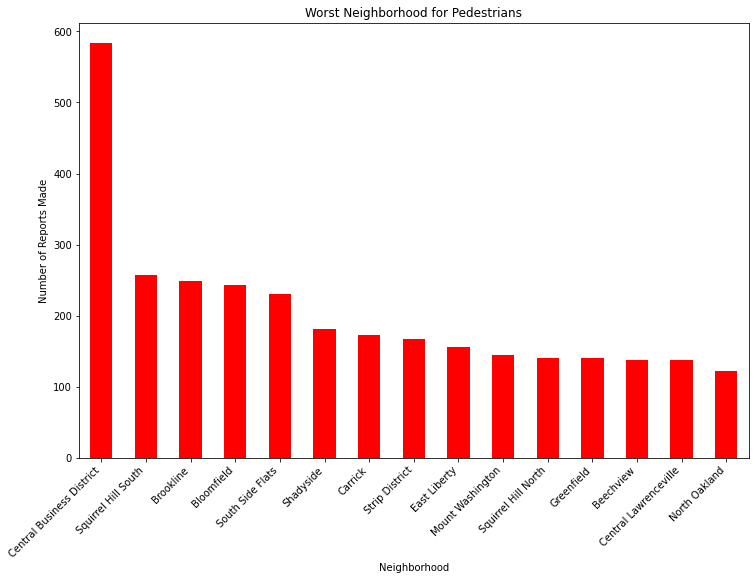

In [16]:
print("Below is a table and graphic representation of the worst neighborhood for pedestrians")
print("--------------------------------")
print(total_sorted_worst.head(15)) #print the first 15 values


#make a graph! :)
plt.figure(figsize=(12,8))
total_sorted_worst.head(15).plot(kind='bar', color='red')
plt.title('Worst Neighborhood for Pedestrians')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()

## Best Neighborhood for Pedestrians: Visual Representation

Below is a table and graphic representation of the best neighborhood for pedestrians
--------------------------------
East Carnegie         3
Esplen                4
Northview Heights     4
St. Clair             4
Chartiers City        5
Fairywood             6
Ridgemont             6
Glen Hazel            6
Bedford Dwellings     7
Swisshelm Park        8
Chateau              10
Summer Hill          10
Hays                 11
South Shore          11
East Hills           13
dtype: int64


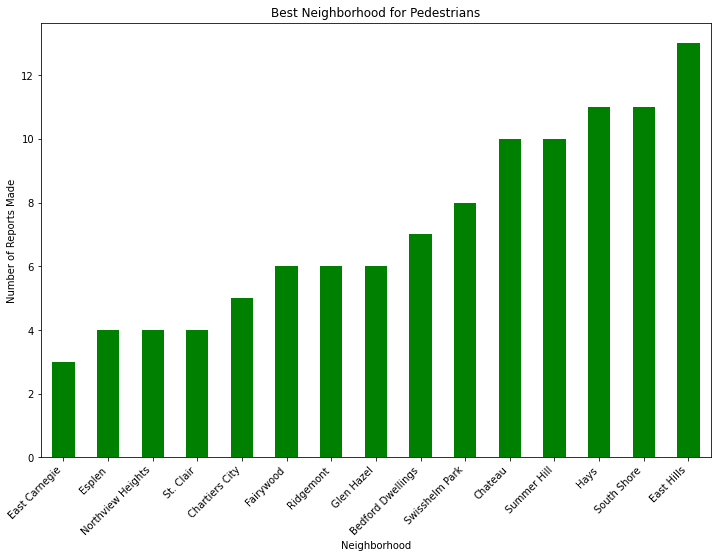

In [17]:
print("Below is a table and graphic representation of the best neighborhood for pedestrians")
print("--------------------------------")
print(total_sorted_best.head(15)) #print the first 15 values


#make a graph! :)
plt.figure(figsize=(12,8))
total_sorted_best.head(15).plot(kind='bar', color='green')
plt.title('Best Neighborhood for Pedestrians')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reports Made')
plt.xticks(rotation=45, ha='right')
plt.show()

In this case, the neighborhoods that have lower values of reports are better (present on the left side of the graph)

### Creating a GeoPandas Map

In [18]:
# series --> dataframe
best_df = pd.DataFrame(total_sorted_best).reset_index()
best_df.columns= ['Neighborhood', '311 Civilian Safety Hazards Reported']
best_df

,Neighborhood,311 Civilian Safety Hazards Reported
0,East Carnegie,3
1,Esplen,4
2,Northview Heights,4
3,St. Clair,4
4,Chartiers City,5
...,...,...
84,South Side Flats,231
85,Bloomfield,243
86,Brookline,249
87,Squirrel Hill South,257


In [19]:
import geopandas as gpd

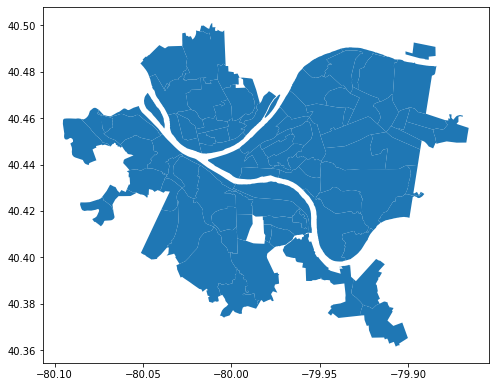

In [20]:
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") #shapefile
neighborhoods.plot(figsize=(8,10)) # plot the geopandas dataframe

In [21]:
#take our data and merge it with the neighborhoods data
best_ngh_map= neighborhoods.merge(best_df, how='left', left_on='hood', right_on='Neighborhood') #tells them how to merge the data with the geopandas shapefile
best_ngh_map[['hood', '311 Civilian Safety Hazards Reported', 'geometry']].head()

,hood,311 Civilian Safety Hazards Reported,geometry
0,Central Oakland,106.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,122.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,27.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,21.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,167.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


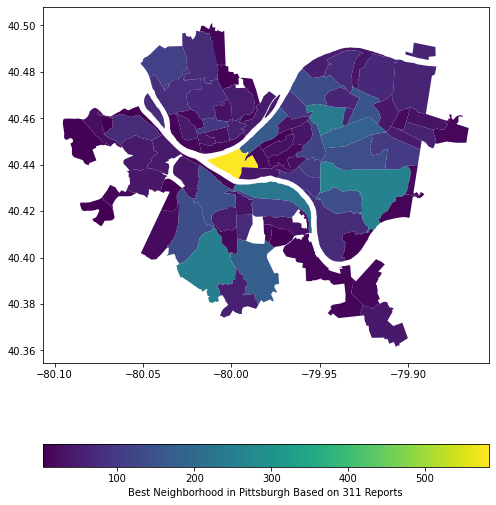

In [22]:
#creates a map that color represents the value of specified variable
best_ngh_map.plot(column='311 Civilian Safety Hazards Reported', legend=True, legend_kwds={'label': "Best Neighborhood in Pittsburgh Based on 311 Reports", 'orientation': "horizontal"}, figsize= (8,10))

## Breakdown by Population
Next we will take our data and analyze it using the population size. The first step will be to create a new dictionary that contains the population values for each neighborhood so that we can later make a series and dataframe.

In [28]:
pop_dict = {}
reports_per_ngh= {}

for index,row in population.iterrows():
    ngh_name = row["Neighborhood"]
    ppl = row["Estimate; Total"]
    
    pop_dict[ngh_name] = ppl
    if (ngh_name in total_sorted_best):
        reports_per_ngh[ngh_name] = ppl/ total_sorted_best[ngh_name]

print("Total population for each neighborhood \n-------")
print(pop_dict)

Total population for each neighborhood 
-------
{'Allegheny Center': 1411.0, 'Allegheny West': 343.0, 'Allentown': 2558.0, 'Arlington': 1852.0, 'Arlington Heights': 272.0, 'Banksville': 3858.0, 'Bedford Dwellings': 1349.0, 'Beechview': 8078.0, 'Beltzhoover': 1702.0, 'Bloomfield': 8669.0, 'Bluff': 6294.0, 'Bon Air': 920.0, 'Brighton Heights': 7421.0, 'Brookline': 13160.0, 'California-Kirkbride': 803.0, 'Carrick': 10122.0, 'Central Business District': 4060.0, 'Central Lawrenceville': 4775.0, 'Central Northside': 2892.0, 'Central Oakland': 5822.0, 'Chartiers City': 560.0, 'Chateau': 3.0, 'Crafton Heights': 3964.0, 'Crawford-Roberts': 2225.0, 'Duquesne Heights': 2522.0, 'East Allegheny': 2095.0, 'East Carnegie': 610.0, 'East Hills': 2859.0, 'East Liberty': 5537.0, 'Elliott': 2491.0, 'Esplen': 309.0, 'Fairywood': 1181.0, 'Fineview': 1270.0, 'Friendship': 1840.0, 'Garfield': 3966.0, 'Glen Hazel': 716.0, 'Greenfield': 7690.0, 'Hays': 405.0, 'Hazelwood': 4257.0, 'Highland Park': 6810.0, 'Homew

Now let's preview the updated totals dictionary, in respect to population.

In [42]:
#Total number of people vs the number of reports filed:
print("Number of Reports Filed for Each Neighborhood: Adjusted for Population")
print(reports_per_ngh)

Number of Reports Filed for Each Neighborhood: Adjusted for Population
Neighborhood
Allegheny Center        56.440000
Allegheny West          10.393939
Allentown               75.235294
Arlington               61.733333
Banksville             192.900000
                          ...    
Upper Hill              53.828571
Upper Lawrenceville     52.961538
West Oakland            63.592593
Westwood                90.692308
Windgap                 63.916667
Name: Number of Reports Filed: Adjusted, Length: 88, dtype: float64


Now we will take this number and convert it to a Series

In [44]:
df_reports_adj= pd.Series(reports_per_ngh)
df_reports_adj

Neighborhood
Allegheny Center        56.440000
Allegheny West          10.393939
Allentown               75.235294
Arlington               61.733333
Banksville             192.900000
                          ...    
Upper Hill              53.828571
Upper Lawrenceville     52.961538
West Oakland            63.592593
Westwood                90.692308
Windgap                 63.916667
Name: Number of Reports Filed: Adjusted, Length: 88, dtype: float64

The series can then create a DataFrame, which allows us to reformat our data

In [47]:
reports_df= pd.DataFrame(df_reports_adj).reset_index()
reports_df.columns=['Neighborhood', 'Number of Reports Filed: Adjusted']
reports_df

,Neighborhood,Number of Reports Filed: Adjusted
0,Allegheny Center,56.440000
1,Allegheny West,10.393939
2,Allentown,75.235294
3,Arlington,61.733333
4,Banksville,192.900000
...,...,...
83,Upper Hill,53.828571
84,Upper Lawrenceville,52.961538
85,West Oakland,63.592593
86,Westwood,90.692308


Ideally, this data would be sorted from least to greatest (so we can find the neighborhood with the least amount of reports per person).

In [37]:
reports_per_ngh = reports_df.groupby('Neighborhood').sum()['Number of Reports Filed: Adjusted']
reports_per_ngh.sort_values(ascending=True)

Neighborhood
Chateau                        0.300000
South Shore                    1.090909
Strip District                 4.473054
Central Business District      6.963979
Allegheny West                10.393939
                                ...    
Banksville                   192.900000
Fairywood                    196.833333
East Carnegie                203.333333
East Hills                   219.923077
Northview Heights            386.250000
Name: Number of Reports Filed: Adjusted, Length: 88, dtype: float64

Now that it is factored with population, we can remake our map!

In [39]:
pop_map = neighborhoods.merge(reports_per_ngh, how='left', left_on='hood', right_on='Neighborhood')
pop_map[['hood', 'Number of Reports Filed: Adjusted', 'geometry']].head()

,hood,Number of Reports Filed: Adjusted,geometry
0,Central Oakland,54.924528,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,78.704918,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,63.592593,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,105.952381,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,4.473054,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


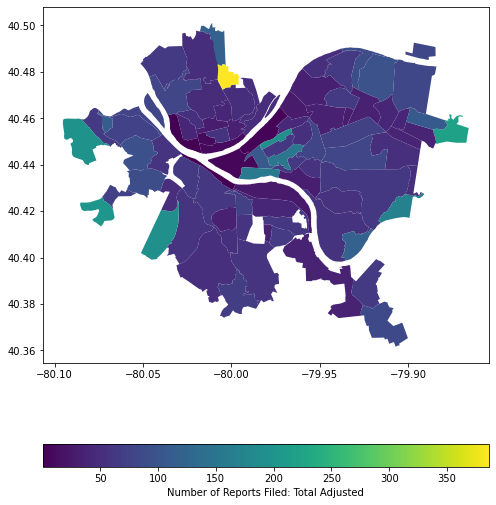

In [40]:
pop_map.plot(column="Number of Reports Filed: Adjusted", legend=True, legend_kwds={'label': 'Number of Reports Filed: Total Adjusted','orientation': "horizontal"}, figsize= (8,10))

## Conclusion:
The best neighborhoods according to my findings:

1. Chateau                        0.300000
2. South Shore                    1.090909
3. Strip District                 4.473054
4. Central Business District      6.963979
5. Allegheny West                10.393939

The worst neighborhoods according to my findings:
1. Northview Heights            386.250000
2. East Hills                   219.923077
3. East Carnegie                203.333333
4. Fairywood                    196.833333
5. Banksville                   192.900000